# 단순 선형 회귀 분석

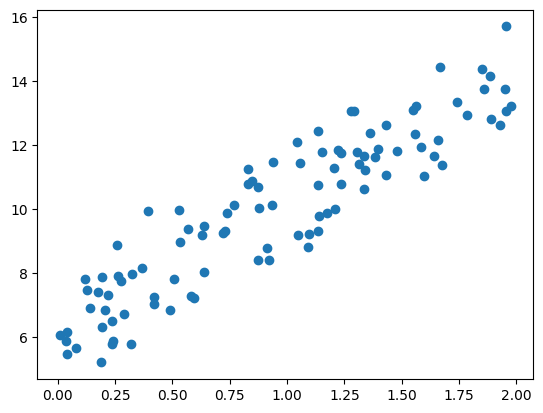

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [ ]:
def get_cost(X,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)

  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  w0_factors=np.ones((N,1))

  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w2_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [ ]:
def gradient_descent_steps(X,y,iters=10000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1,w0=gradient_descent_steps(X,y,iters=10000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:8.765 w0:0.000
Gradient Descent Total Cost:11.4862


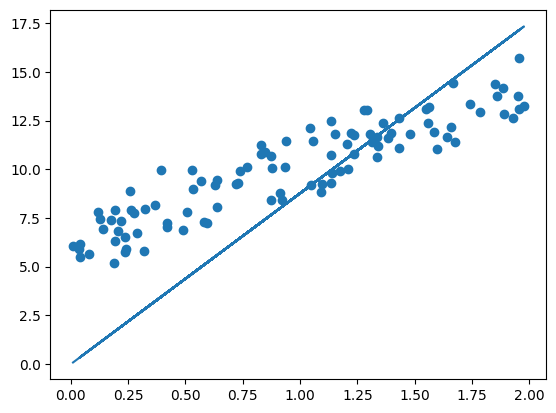

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

# 확률적 경사 하강법

In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]

    w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [ ]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:", round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Cost :{0:.4f}'.format(get_cost(y,y_pred)))

w1: 8.734 w0: 0.0
Cost :11.4874


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X=np.arange(4).reshape(2,2)
print('일차 계수 피처:',X)

poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('2차 계수 피처:', poly_ftr)

일차 계수 피처: [[0 1]
 [2 3]]
2차 계수 피처: [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)

print(np.round(model.named_steps['linear'].coef_,2))

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


# 시그모이드 함수

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test=train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [8]:
from sklearn.metrics import accuracy_score,roc_auc_score

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train) #이 부분 추가
lr_preds=lr_clf.predict(X_test)
lr_preds_proba=lr_clf.predict_proba(X_test)[:,1]

print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test,lr_preds),
                                 roc_auc_score(y_test,lr_preds_proba)))

accuracy: 0.977, roc_auc: 0.995


In [10]:
solvers=['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
  lr_clf=LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds=lr_clf.predict(X_test)
  lr_preds_proba=lr_clf.predict_proba(X_test)[:,1]

  print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                               accuracy_score(y_test,lr_preds),
                                                               roc_auc_score(y_test, lr_preds_proba)))

solver:lbfgs, accuracy:0.977, roc_auc:0.995
solver:liblinear, accuracy:0.982, roc_auc:0.995
solver:newton-cg, accuracy:0.977, roc_auc:0.995
solver:sag, accuracy:0.982, roc_auc:0.995
solver:saga, accuracy:0.982, roc_auc:0.995


In [11]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear','lbfgs'],
        'penalty':['l2','l1'],
        'C':[0.01,0.1,1,5,10]}

lr_clf=LogisticRegression()

grid_clf=GridSearchCV(lr_clf,param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

# 자전거 대여 수요 예측

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

bike_df=pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(4)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3


In [17]:
drop_columns=['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

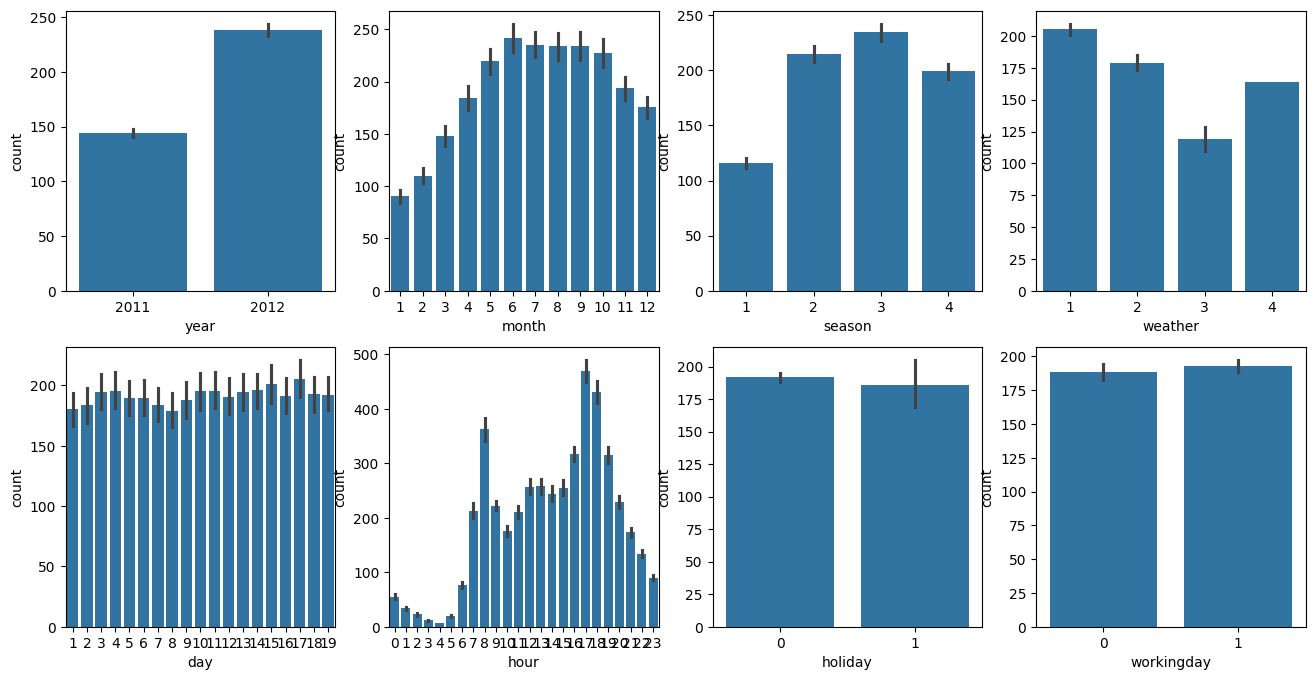

In [19]:
fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features=['year','month','season','weather','day','hour','holiday','workingday']

for i,feature in enumerate(cat_features):
  row=int(i/4)
  col=i%4
  sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
  log_y=np.log1p(y)
  log_pred=np.log1p(pred)
  squared_error=(log_y-log_pred)**2
  rmsle=np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
  rmsle_val=rmsle(y,pred)
  rmse_val=rmse(y,pred)
  mae_val=mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.165, RMSE: 140.900, MAE : 105.924


In [24]:
def get_top_error_data(y_test, pred, n_tops=5):
  result_df=pd.DataFrame(y_test.values,columns=['real_count'])
  result_df['predicted_count']=np.round(pred)
  result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])

  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

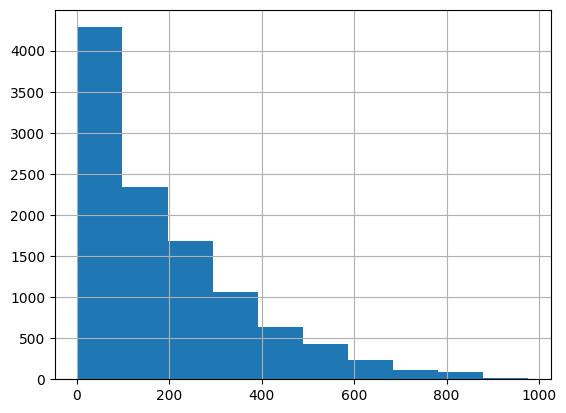

In [25]:
y_target.hist()

<Axes: >

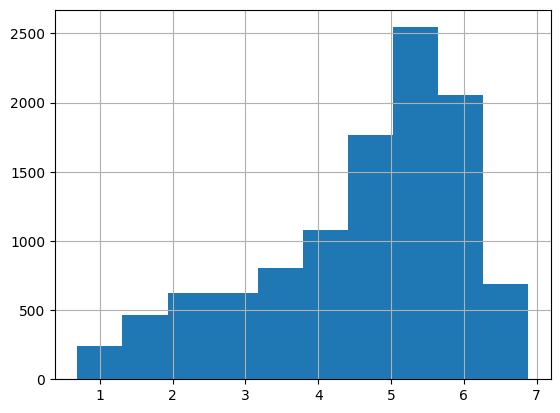

In [26]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

In [30]:
y_target_log=np.log1p(y_target)

X_train,X_test,y_train,y_test=train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

y_test_exp=np.expm1(y_test)

pred_exp=np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE : 109.286


<Axes: ylabel='None'>

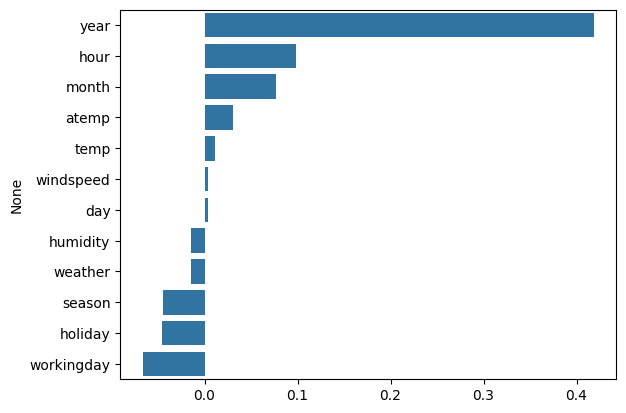

In [31]:
coef=pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [32]:
X_features_ohe=pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [33]:
X_train, X_test,y_train,y_test=train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  if is_expm1:
    y_test=np.expm1(y_test)
    pred=np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  evaluate_regr(y_test,pred)

lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE : 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE : 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE : 72.803


# 373p

<Axes: ylabel='None'>

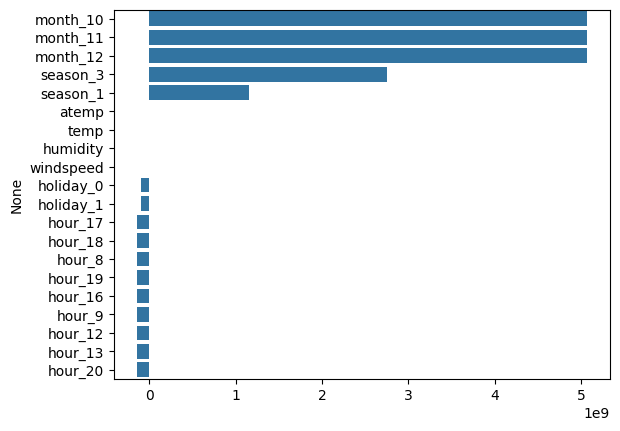

In [35]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgb_reg=XGBRegressor(n_estimators=500)
lgbm_reg=LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.417, MAE : 31.210
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.356, MAE : 32.749
### XGBRegressor ###
RMSLE: 0.339, RMSE: 51.475, MAE : 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE : 29.029


# 주택 가격 실습

In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org=pd.read_csv('house_price.csv')
house_df=house_df_org.copy()
house_df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [40]:
print('데이터 세트의 모양:', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series=house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 모양: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 칼럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


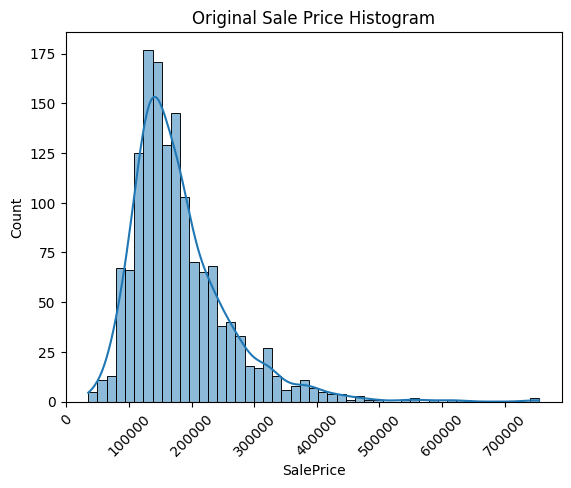

In [41]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'],kde=True)
plt.show()

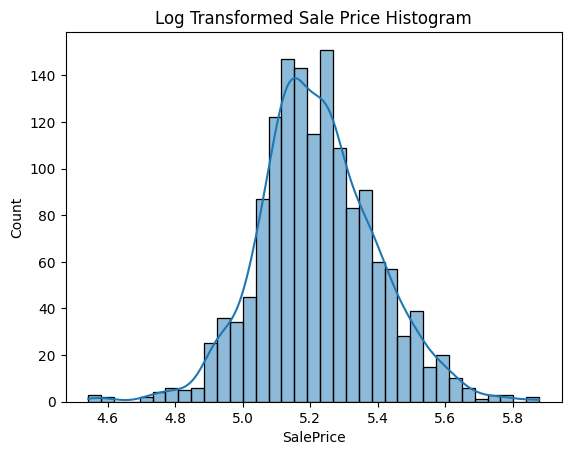

In [42]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice=np.log10(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [46]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [48]:
original_SalePrice=house_df['SalePrice']

house_df['SalePrice']=np.log1p(house_df['SalePrice'])
# house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

#house_df.fillna(house_df.mean(),inplace=True)

null_column_count=house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## 피처의 Type :\n',house_df.dtypes[null_column_count.index])

## 피처의 Type :
 LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object
